<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Полина, многие замечания устранены, однако, все равно есть что поправить:
1. При построении второй модели линейной регрессии и последующих моделей СПО стоит удалить из количественных - мы сделали вместо него категориальный
2. При прогнозировании на cow_buy не обучать заново scaler, encoder  - это касается как линейной, так и логистической регрессии - расписал подробнее комментарий непосредственно на этапе предсказания удоя на данных cow_buy
3. При построении модели логистической регрессии жирность по аналогии со СПО удаляем из количественных, так как преобразовали его в категориальный
4. Ошибка в логике подбора порога - добавил свой код, на его основе посмотри, при каком значении порога будет максимальным precision

    По итогу результаты по выбору коров изменятся    

</div>


<div class="alert alert-success">
  <b> ✔️Комментарий ревьюера ✔️</b>

Привет, Полина! Меня зовут Михаил, я буду проверять твой проект. Предлагаю общаться на 'ты' :)
Однако, если это неудобно - сообщи, и мы перейдем на 'Вы'. Моя главная цель —  поделиться с тобой своим опытом и помочь тебе стать крутым специалистом, а не только указать на совершенные тобой ошибки.

Видно, что к проекту приложен большой труд. Все ключевые этапы в работе выполнены, статистическое исследование проведено качественно. Так что в целом справиться с задачей тебе удалось.

Есть несколько аспектов, которые **требуют** твоего **внимания**. Комментарии по ним помечены красным цветом и символами ❌. После их доработки проект будет принят, осталось совсем немного :) 
    

Давай работать над проектом в диалоге: если **ты что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Мне будет легче отследить изменения, если ты будешь использовать синюю форму, которую я прикреплю ниже. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 



Жду проект на повторное ревью. Успехов в изучении!



</div>
<div class="alert alert-block alert-danger"> <b>❌ Комментарий ревьюера ❌</b> 
    Так я выделяю моменты, которые требуют особого внимания. Нужно будет учесть их и внести корректировки в свою работу. </div>
<div class="alert alert-block alert-warning"> <b>⚠️ Комментарий ревьюера ⚠️</b> 
    Желтым я отмечу рекомендации, которые, могут быть полезными при твоей работе. Они носят рекомендационный характер, но будет классно, если ты будешь учитывать их при работе.</div>
<div class="alert alert-block alert-success"> <b>✔️ Комментарий ревьюера ✔️</b>
    Так я выделяю удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>
<div class="alert alert-block alert-info">
    
А в таком блоке ты можешь оставить комментарии для меня 
    
</div>

# Описание проекта
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее введение в проект - пригодится в будущем, когда соберешь большое портфолио и откроешь проект вновь👍

</div>


## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
import phik
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from phik.report import plot_correlation_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
    

    
Если загружаем несколько функций из одного пакета, то удобнее записать это через запятую.
    
`from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, confusion_matrix`
    
А если через запятую будет больше трех-четырех позиций (а длина строки больше 90 символов), в таком случае здесь было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a> - не оставлять длинных строк.

Такое оформление предпочтительнее:    
    
`from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    r2_score,
    precision_score,
    recall_score
)`
    
        
</div>


<div class="alert alert-block alert-info">
    
окей, спасибо! 
    
</div>

In [2]:
def stat_info(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    left_border = d_min
    right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    variance_estimate = np.var(serie, ddof=1)
    standart_dev = np.std(serie, ddof=1)
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standart_dev))
    
    fig = plt.figure(figsize =(6, 5))
    print(plt.boxplot(serie))
    
    return [mean, variance_estimate, standart_dev]

def CPO_cat(row):
    
    CPO = row['спо']
    if CPO <=0.92:
        return 'низкий'
    else:
        return 'высокий'

def stat_info_pie(serie):
    serie.value_counts().plot(kind='pie')
    
def EKE2(row):
    EKE = row['эке']
    EKE2= EKE**2
    return EKE2    

def vkus(row):
    
    vkusno = row['вкус_молока']
    if vkusno =='вкусно':
        return 1
    else:
        return 0
    
def jirn(row):
    
    jir = row['жирность']
    if jir <=3.45:
        return 'низкая'
    elif  3.45 <= jir <=3.68:
        return 'средняя'
    else:
        return 'высокая'

In [3]:
RANDOM_STATE = 42
random.seed(RANDOM_STATE)

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Испорты всех библитоек необходимо перенести в этот блок, согласно стандарту pep8: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html

</div>


<div class="alert alert-block alert-info">
    
перенесла
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Хорошо👍

</div>


In [4]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv',sep=';',decimal=",")
ferma_main.info()
display(ferma_main.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   А еще на данном этапе можно указать, что разделителем у нас является запятая - за это отвечает параметр `decimal=","` в методе read_csv - это касается всех исходных файлов с данными

</div>




<div class="alert alert-block alert-info">
    
добавила
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   👍

</div>


In [5]:
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv',sep=';',decimal=",")
ferma_dad.info()
display(ferma_dad.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
cow_buy = pd.read_csv('/datasets/cow_buy.csv',sep=';',decimal=",")
cow_buy.info()
display(cow_buy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Вывод:
Пропущенных значений в строках нет, названия столбцов соответствуют содержанию.
В первой таблице на 5 строк больше, чем во второй, хотя в обеих присутствуют id - возможны дубликаты.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошо. Приступим к предобработке

</div>


##  Предобработка данных

Проверьте данные на наличие пропусков и дубликатов. Узнайте, корректны ли типы данных у каждого признака. При необходимости устраните все проблемы с данными.
 
Поменяем названия столбцов

In [7]:
ferma_main = ferma_main.rename(columns={'Удой, кг': 'удой_кг', 'ЭКЕ (Энергетическая кормовая единица)': 'эке','Сырой протеин, г':'сырой_протеин','СПО (Сахаро-протеиновое соотношение)':'спо','Порода':'порода','Тип пастбища':'тип_пастбища','порода папы_быка':'порода_папы_быка','Жирность,%':'жирность','Белок,%':'белок','Вкус молока':'вкус_молока','Возраст':'возраст'})
ferma_main.head()

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [8]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'имя_папы'})
ferma_dad.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [9]:
cow_buy = cow_buy.rename(columns={'Имя_папы': 'имя_папы','Порода':'порода','Тип пастбища':'тип_пастбища','порода папы_быка':'порода_папы_быка','Текущая_жирность,%':'жирность','Текущий_уровень_белок,%':'белок','Возраст':'возраст'})
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Соответственно, используя `decimal=","` в `read_csv`, такая замена не понадобится

</div>




<div class="alert alert-block alert-info">
    
убрала лишние замены
    
</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Также отмечу, что нас просят правильно оформить названия столбцов согласно стандарту: https://tproger.ru/articles/prodvinutaya-logika-imenovaniya-v-python (Столбцы таблиц и столбцов) - можно оставить русские названия, но все же привести их к стандарту 

</div>


<div class="alert alert-block alert-info">
    
изменила названия столбцов
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Хорошо👍

</div>


Проверим наличие дубликатов:

In [10]:
display(ferma_main.duplicated().sum())
ferma_main.tail(6)

5

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
628,629,6503,16.2,2283,0.94,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.076,вкусно,более_2_лет
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [11]:
ferma_main = ferma_main.drop_duplicates()
display(ferma_main.info())
ferma_main.tail(6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой_кг           629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
623,624,5928,13.6,1832,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.077,не вкусно,более_2_лет
624,625,6812,15.4,1964,0.94,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.88,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.89,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет
628,629,6503,16.2,2283,0.94,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.076,вкусно,более_2_лет


In [12]:
ferma_dad.duplicated().sum()

0

In [13]:
display(cow_buy.duplicated().sum())
display(cow_buy)

4

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   



Думаю, что в таблице коров на покупку у нас разные коровы. В таблице мало признаков, они категориальные, категорий немного - вероятность повторов высокая, поэтому в данном случае я настоятельно рекомендую не удалять дубли
       
</div> 


<div class="alert alert-block alert-info">
    
оставила дубли в таблице коров на покупку
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Верное решение👍 К тому же, фермер дал нам данные по 20 коровам на предсказание, и ожидает результат также по 20 :)

</div>


<div class="alert alert-block alert-info">
    
логично) 
    
</div>

In [14]:
display(cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Удалили полные дубликаты в 1 и 3 таблицах

In [15]:
display(len(ferma_main['id'].unique()))
len(ferma_dad['id'].unique())

629

629

Также проверила, что id не повторяются

In [16]:
ferma_main = ferma_main.replace(['Равнинные','Равнинное','Холмистое','Айдиалл'],['равнинное','равнинное','холмистое','Айдиал'])
ferma_main.head(10)

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,равнинное,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


Поправила значения с ошибками в столбцах, чтобы были одинаковые во всех таблицах

Вывод: поправила типы данный, убедилась в отсутствии пропусков и убрала лишние дубликаты в таблицах.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Молодец, что заметила неявные дубли в столбцах порода папы_быка и тип пастбища👍

</div>


## Исследовательский анализ данных

Проведите статистический анализ всех признаков.
Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
Сделайте выводы о данных:
напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности;
расскажите, как вы планируете улучшить данные.

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Согласно стандарту pep8, объявление функций стоит перенести в отдельный пункт после импорта библиотек в начало проекта

</div>




<div class="alert alert-block alert-info">
    
перенесла функции в начало
    
</div>

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64
Среднее значение: 6188.75
Дисперсия: 2705352.20
Стандартное отклонение: 1644.80
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c6494910>, <matplotlib.lines.Line2D object at 0x7f93c6494c70>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c6494fd0>, <matplotlib.lines.Line2D object at 0x7f93c64a1370>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c64945b0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c64a16d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c64a1a30>], 'means': []}


[6188.75039745628, 2705352.200338217, 1644.7954889098573]

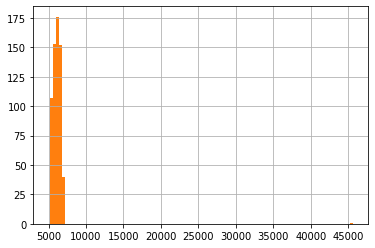

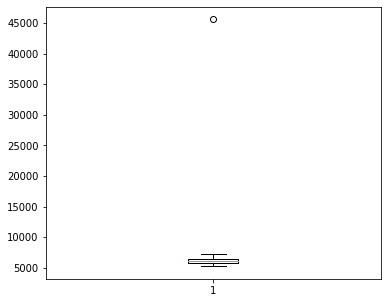

In [17]:
ferma_main['удой_кг'].hist(range=(5000,7500),bins=100)    
stat_info(ferma_main['удой_кг'])

Вывод: заметили аналомалии, у коровы не может быть удой  в 10 раз больше среднего значения - скорее всего ошибка, прийдется удалить строчку, чтобы не искажать данные

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Дейтсвительно, здесь есть явный выброс по удою

</div>


count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64
Среднее значение: 14.54
Дисперсия: 1.71
Стандартное отклонение: 1.31
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c630dd90>, <matplotlib.lines.Line2D object at 0x7f93c631a130>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c631a490>, <matplotlib.lines.Line2D object at 0x7f93c631a7f0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c630da30>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c631ab50>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c631aeb0>], 'means': []}


[14.543879173290936, 1.7067021255050479, 1.3064081006733876]

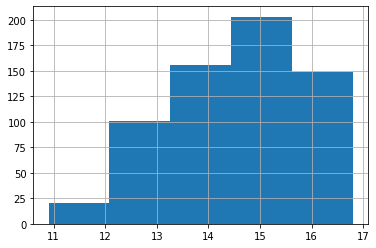

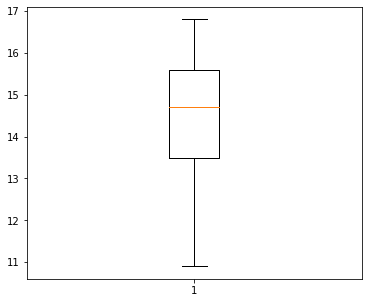

In [18]:
stat_info(ferma_main['эке'])

Вывод: распределение данных выгладит нормальным, дисперсия и отклонения небольшие.

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: сырой_протеин, dtype: float64
Среднее значение: 1923.36
Дисперсия: 33472.99
Стандартное отклонение: 182.96
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c86439d0>, <matplotlib.lines.Line2D object at 0x7f93c644a970>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c644ab50>, <matplotlib.lines.Line2D object at 0x7f93c644a310>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c8643520>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c644adf0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c6485400>], 'means': []}


[1923.3640699523053, 33472.989853472805, 182.9562512008617]

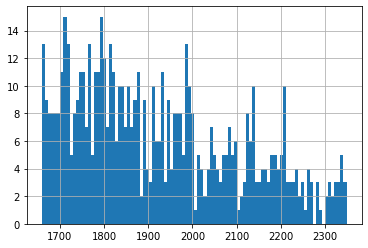

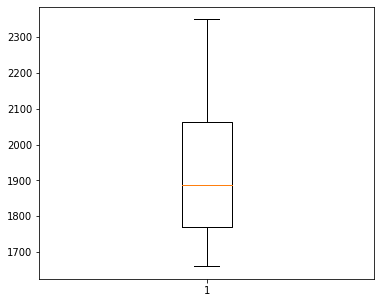

In [19]:
stat_info(ferma_main['сырой_протеин'])

Вывод: распределение данных выглядит бимодальным, т.к. наблюдаются несколько вершин на графике, дисперсия и отклонения небольшие.

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64
Среднее значение: 0.91
Дисперсия: 0.00
Стандартное отклонение: 0.03
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c6370580>, <matplotlib.lines.Line2D object at 0x7f93c63708e0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c6370c40>, <matplotlib.lines.Line2D object at 0x7f93c6370fa0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c6370220>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c85ce340>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c85ce6a0>], 'means': []}


[0.9131160572337041, 0.0010370103946209224, 0.03220264577050964]

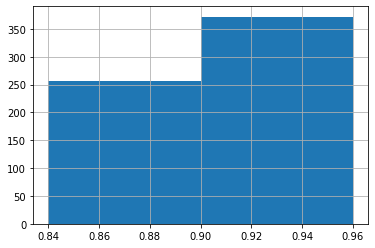

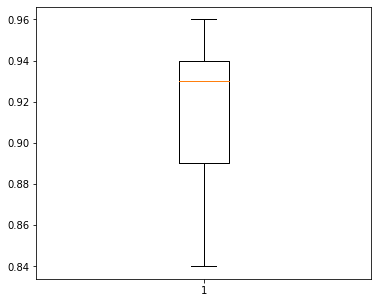

In [20]:
stat_info(ferma_main['спо'])

Вывод: распределение данных выгладит бимодальным, т.к. наблюдаются несколько вершин на графике, дисперсия и отклонения небольшие.

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64
Среднее значение: 3.60
Дисперсия: 0.03
Стандартное отклонение: 0.17
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c85e3490>, <matplotlib.lines.Line2D object at 0x7f93c85e37f0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c85e3b50>, <matplotlib.lines.Line2D object at 0x7f93c85e3eb0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c85e3130>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c85d5250>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c85d55b0>], 'means': []}


[3.6036565977742447, 0.028444888256559303, 0.16865612427824642]

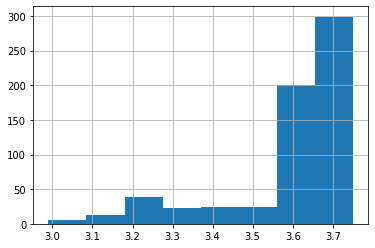

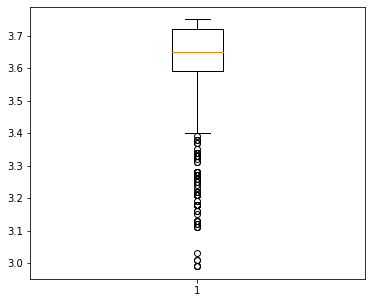

In [21]:
stat_info(ferma_main['жирность'])

Видим отклонения значений снизу графика, однако, значения находятся в рамках нормального, вряд ли это аномалии. Также распределение выглядит бимодальным, т.к. наблюдаются две вершины на графике

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64
Среднее значение: 3.08
Дисперсия: 0.00
Стандартное отклонение: 0.00
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c63af700>, <matplotlib.lines.Line2D object at 0x7f93c63afa60>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c63afdc0>, <matplotlib.lines.Line2D object at 0x7f93c63bc160>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c63af3a0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c63bc4f0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c63bc850>], 'means': []}


[3.075670906200318, 6.498212712525209e-06, 0.0025491592167860384]

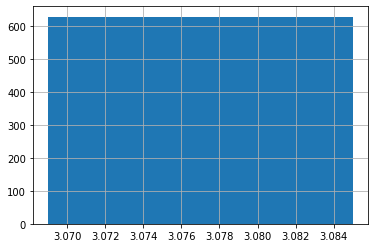

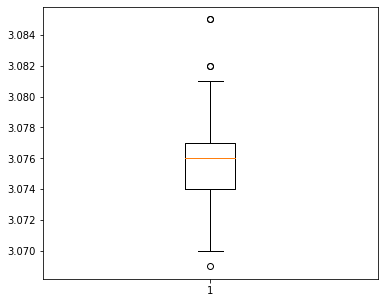

In [22]:
stat_info(ferma_main['белок'])

Значения белка несущественно отклоняются от среднего

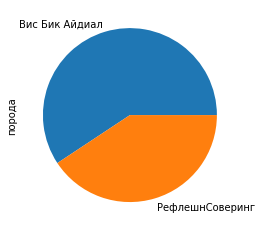

In [23]:
stat_info_pie(ferma_main['порода'])

Более половины коров относятся к породе Вис Бик Айдал

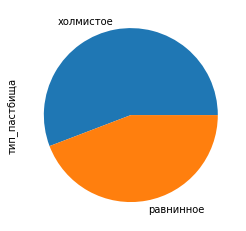

In [24]:
stat_info_pie(ferma_main['тип_пастбища'])

Чуть более половины пастбищ холмистые

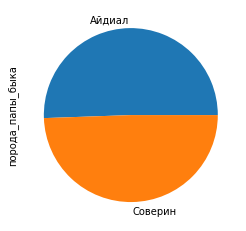

In [25]:
stat_info_pie(ferma_main['порода_папы_быка'])

Половина пап быков Айдал и половина  - Соверин

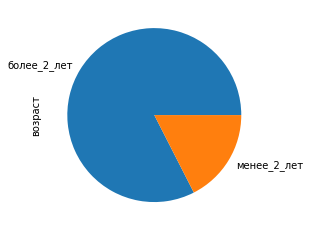

In [26]:
stat_info_pie(ferma_main['возраст'])

примерно 80% коров старше 2х лет

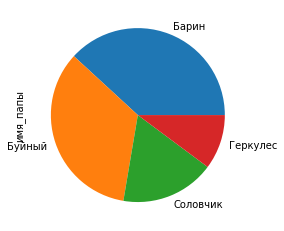

In [27]:
stat_info_pie(ferma_dad['имя_папы'])

Самые распросраненные имена пап быков - Буйный и Барин, также встречаются Геркулес и Соловчик

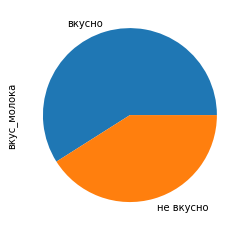

In [28]:
stat_info_pie(ferma_main['вкус_молока'])

Более половины молока считается вкусным

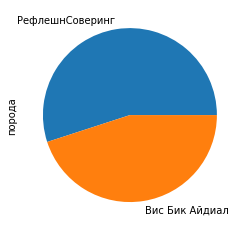

In [29]:
stat_info_pie(cow_buy['порода'])

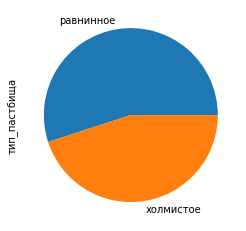

In [30]:
stat_info_pie(cow_buy['тип_пастбища'])

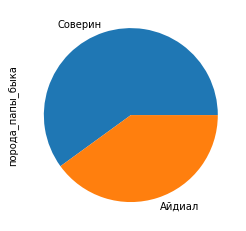

In [31]:
stat_info_pie(cow_buy['порода_папы_быка'])

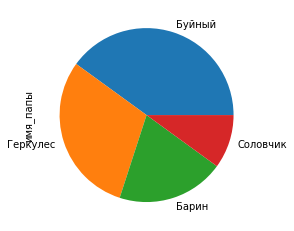

In [32]:
stat_info_pie(cow_buy['имя_папы'])

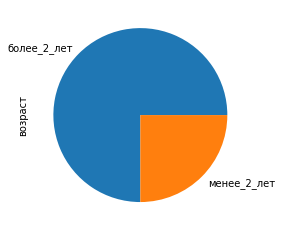

In [33]:
stat_info_pie(cow_buy['возраст'])

Распределение категориальных признаков в табоце cow_buy примерно такое же, как и в основной таблице - вероятно, коровы в таблице для покупки были выбраны случайным образом, т.к. представляют собой достаточно репрезентативную выборку

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: жирность, dtype: float64
Среднее значение: 3.58
Дисперсия: 0.02
Стандартное отклонение: 0.13
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c639b7c0>, <matplotlib.lines.Line2D object at 0x7f93c639ba90>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c639b340>, <matplotlib.lines.Line2D object at 0x7f93c6566940>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c639bee0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c6566430>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c65663d0>], 'means': []}


[3.5774999999999997, 0.016082894736842115, 0.12681835331229513]

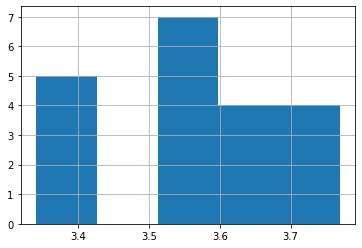

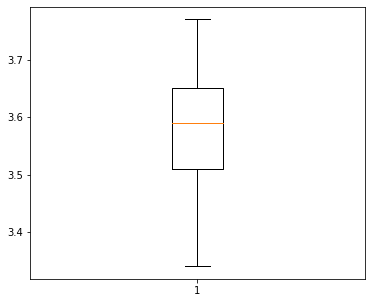

In [34]:
stat_info(cow_buy['жирность'])

Значения жирности в таблице коров для покупки не отклоняются значительно от значений в общей таблице, распределение является бимодальным, т.к. наблюдаются несколько вершин на графике

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: белок, dtype: float64
Среднее значение: 3.07
Дисперсия: 0.00
Стандартное отклонение: 0.01
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c8596d00>, <matplotlib.lines.Line2D object at 0x7f93c8596e50>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c8596a00>, <matplotlib.lines.Line2D object at 0x7f93c8596040>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c64fed90>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c65066a0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c65061c0>], 'means': []}


[3.0695, 0.00010689473684210607, 0.010338991094014255]

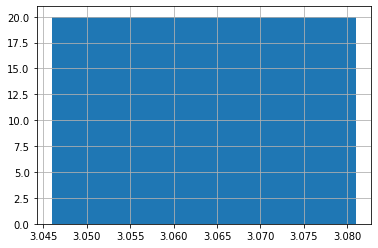

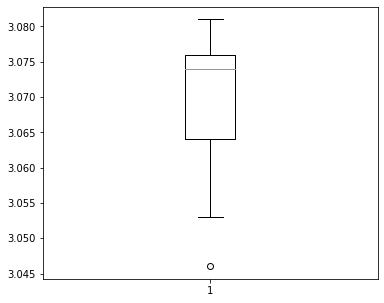

In [35]:
stat_info(cow_buy['белок'])

Значения столбца белок также не отклоняются значительно от среднего

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь объединять датафреймы рано - на это есть несколько причин: во-первых, сразу после предобработки стоит посмотреть на распределения данных по каждому датасету отдельно, чтобы, в случае обнаружения аномалий, которые могли были пропущены, мы могли сразу обратить на них внимание и исправить в изначальном датасете. Во-вторых, нам необходимо построить три модели линейной регрессии, постепенно вводя дополнительных признаки, а затем сравнить их качество - этого требует заказчик в ТЗ

</div>


<div class="alert alert-block alert-info">
    
убрала объединение
    
</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Мы также должны построить соответствующие графики для признаков из таблиц ferma_dad и cow_buy

</div>


<div class="alert alert-block alert-info">
    
добавила графики
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено👍

</div>


In [36]:
ferma_main[ferma_main['удой_кг'] > 40000].index

Int64Index([16], dtype='int64')

In [37]:
ferma_dad = ferma_dad.drop(index= 16)
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        628 non-null    int64 
 1   имя_папы  628 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.7+ KB


count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64
Среднее значение: 6125.97
Дисперсия: 226439.94
Стандартное отклонение: 475.86
{'whiskers': [<matplotlib.lines.Line2D object at 0x7f93c6485040>, <matplotlib.lines.Line2D object at 0x7f93c64854f0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f93c6485eb0>, <matplotlib.lines.Line2D object at 0x7f93c6485dc0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f93c8607b50>], 'medians': [<matplotlib.lines.Line2D object at 0x7f93c654d160>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f93c654df10>], 'means': []}


[6125.968152866242, 226439.93518828918, 475.85705331358616]

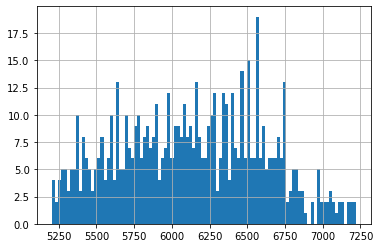

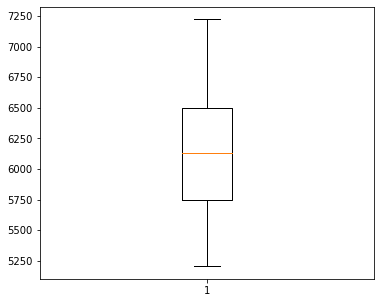

In [38]:
ferma_main = ferma_main.drop(ferma_main[ferma_main['удой_кг'] > 40000].index)
stat_info(ferma_main['удой_кг'])

Теперь распределение по колонке Удой также выглядит бимодальным, т.к. наблюдаются несколько вершин на графике.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   


   
   Соответственно, нужно не забыть удалить строку с таким же id в таблице ferma_dad.csv, чтобы в них стало одинаковое число строк.

</div>




<div class="alert alert-block alert-info">
    
удалила
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено👍

</div>


Вывод: мы убедились в адекватности загруженных данных, посмотрели распределения по признакам, избавились от аномалий.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   На гистограммах явно заметна бимодальность(https://www.codecamp.ru/blog/bimodal-distribution/) - это значит, что такие распределения не являются нормальными

</div>


<div class="alert alert-block alert-info">
    
добавила в выводе
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Хорошо👍 Поэтому и применяем phik при расчете корреляции

</div>


## Корреляционный анализ

Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.
Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

In [39]:
ferma_matrix = ferma_main.phik_matrix()
ferma_matrix

interval columns not set, guessing: ['id', 'удой_кг', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
id,1.000000,0.000000,0.000000,0.108271,0.382303,0.611843,0.037776,0.320977,0.519949,0.000000,0.039659,0.000000
удой_кг,0.000000,1.000000,0.719239,0.465118,0.661615,0.161643,0.279645,0.518114,0.706516,0.063045,0.178281,0.998071
эке,0.000000,0.719239,1.000000,0.458283,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596
сырой_протеин,0.108271,0.465118,0.458283,1.000000,0.386550,0.090971,0.097165,0.000000,0.397691,0.202386,0.173817,0.353829
спо,0.382303,0.661615,0.591190,0.386550,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410
порода,0.611843,0.161643,0.123086,0.090971,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295
тип_пастбища,0.037776,0.279645,0.106758,0.097165,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455
порода_папы_быка,0.320977,0.518114,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817
жирность,0.519949,0.706516,0.715914,0.397691,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913
белок,0.000000,0.063045,0.000000,0.202386,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000


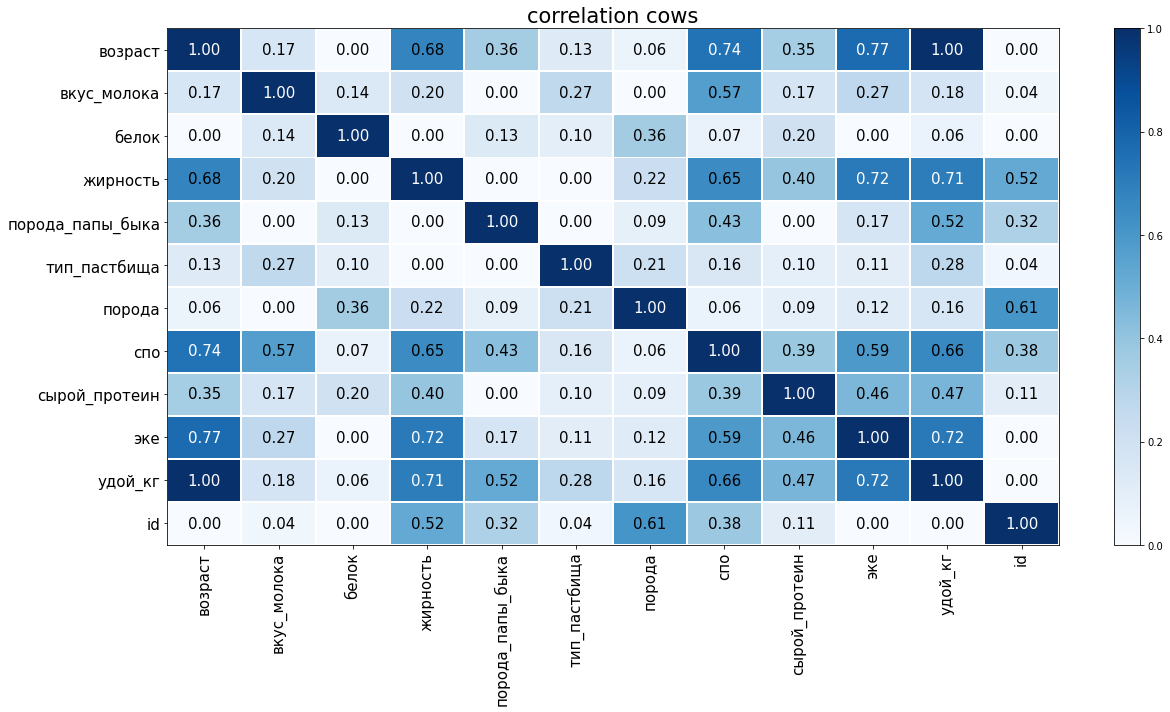

In [40]:
plot_correlation_matrix(ferma_matrix.values, x_labels=ferma_matrix.columns, y_labels=ferma_matrix.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation cows', fontsize_factor=1.5,
                        figsize=(18,10))
plt.tight_layout()

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   


   
   Здесь представлены не все признаки, а рассчитать коэффициент корреляции по ним нужно. Так как в нашем проекте данные распределены не нормально - это значит, что нам нужно использовать библиотеку Phik, предварительно установив ее через `!pip install phik`. Корреляция Пирсона, которая используется в методе corr по умолчанию, нам не подходит. phik, это передовой способ вычисления коэффициентов корреляции для любых типов признаков. Кроме того, в библиотеке есть визуализация. Стоит учитывать, что этот коэффициент показывает не только линейные связи, но и нелинейные. Ссылка на документацию: https://phik.readthedocs.io/en/latest/ - также по построению корреляционной матрицы через phik можно посмотреть в уроке 2 (тема 8 этого спринта (Метрики в задаче классификации), урок 2(Логистическая регрессия: ограничения модели)

</div>




<div class="alert alert-block alert-info">
    
исправила выше, добавила визуализацию выше
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   👍

</div>


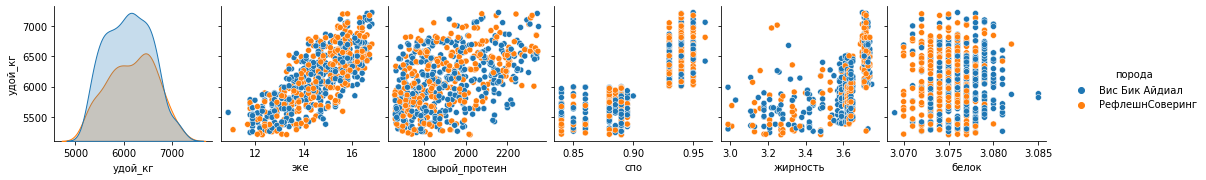

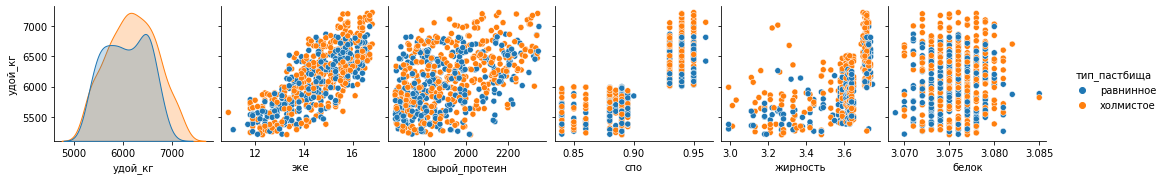

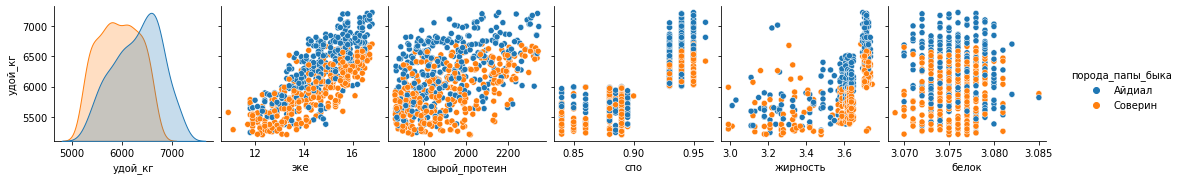

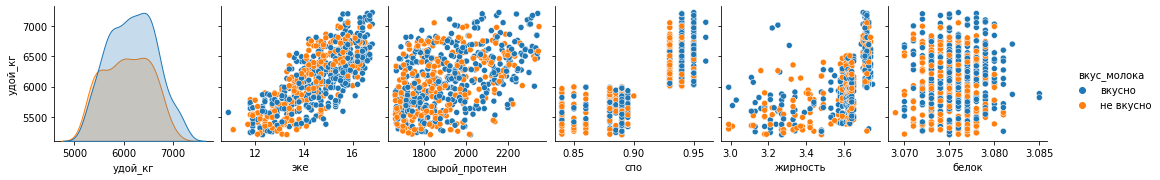

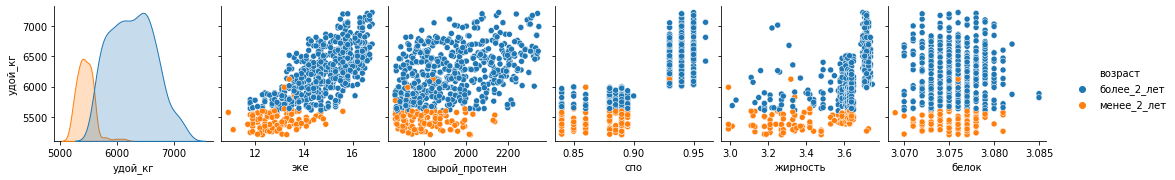

In [41]:
cat_col=['порода','тип_пастбища','порода_папы_быка','вкус_молока','возраст']
q_col = ['удой_кг','эке','сырой_протеин','спо','жирность','белок']

for col in cat_col:
    display(sns.pairplot(ferma_main, y_vars="удой_кг", x_vars=q_col,hue=col))

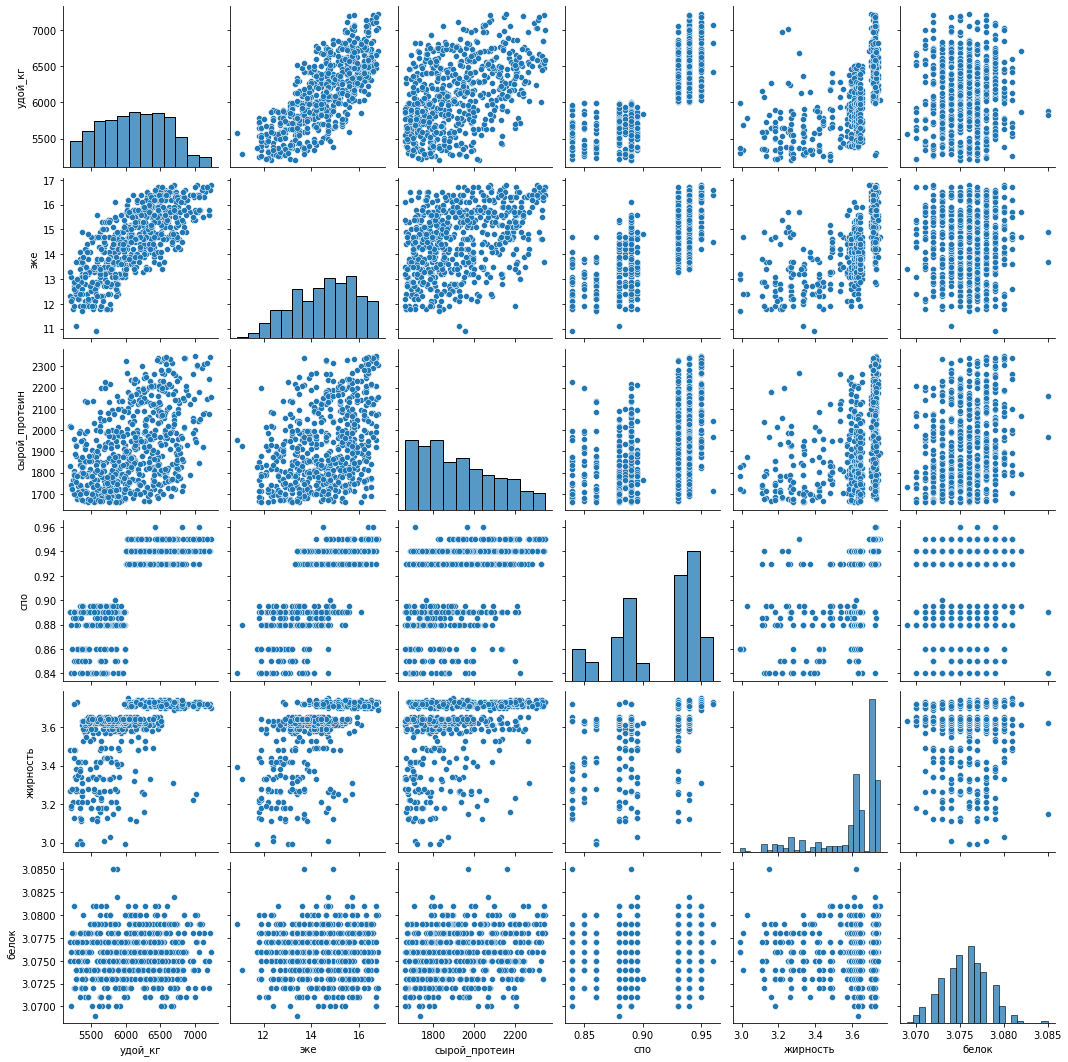

In [42]:
sns.pairplot(ferma_main, y_vars=q_col, x_vars=q_col)

Вывод: заметили следующие взаимосвязи признака Удой:
        1) С энергетической единицей наблюдается сильная положительная нелинейная корреляция
        2) С признаком сырой протеин наблюдается небольшая положительная корреляция
        3) С признаком сахаро-протеиновое соотношение - положительная корреляция, нелинейная
        4) С признаком жирность - положительная корреляция
        5) С признаком белок - корреляция незначительная
        6) С признаком порода не наблюдается сильной взаимосвязи
        7) С признаком тип пастбища также не наблюдается сильной взаимосвязи
        8) С признаком порода папы есть корреляция - показатели лучше для породы папы Айдал
        9) С признаком вкус молока взаимосвязи незначительны
        10) С признаком возраст сильная взаимосвязь - у коров младше 2х лет значительно меньше показатель удоя
        11) С признаком Имя папы также есть взаимосвязь, показатели лучше у Буйного и Геркулеса, хуже всего - у Барина.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   В целом, визуализация зависимостей с помощью pairplot получилась хорошая - основные зависимости на ней видны, единственное, масштаб не очень удачный

</div>


<div class="alert alert-block alert-info">
    
после того как убрала колонки с текущей жирностью и текущим белком мастштаб стал побольше
    
</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Также обрати внимание, что связь с ЭКЕ также нелинейная связь. Касательно мультиколлинеарности - о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. Есть ли она у нас? 

</div>


<div class="alert alert-block alert-info">
    
исправила выводы, мультиколлинеарности нет, т.к. нет значений коэффициентов от 0.9 до 0.95
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Согласен👍

</div>


## Обучение модели линейной регрессии

Построим первую модель:

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Повторюсь, импорт функций необходимо перенести в отдельных блок в начале проекта. Объявление константы также переносится в начало проекта, после функций 

</div>




<div class="alert alert-block alert-info">
    
перенесла все в начало проекта
    
</div>

R2 score = 0.7844078173416967


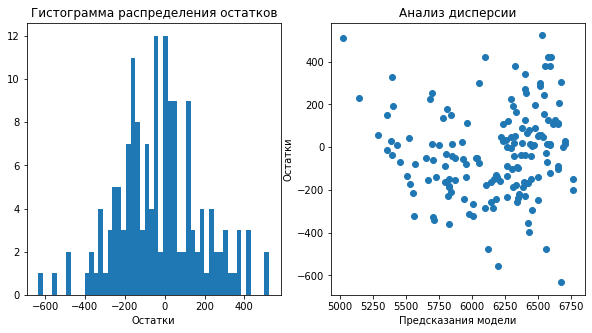

In [43]:
X = ferma_main.drop(columns = ['удой_кг','жирность','белок','вкус_молока'], axis=1)
y = ferma_main['удой_кг']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

encoder = OneHotEncoder(sparse=False) 

cat_col_names = ['тип_пастбища','порода_папы_быка','возраст','порода']
num_col_names = ['эке','сырой_протеин','спо']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

r2 = r2_score(y_test, predictions)  

residuals = y_test - predictions

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions,residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
print('R2 score =',r2)
plt.show()

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Обрати внимание - жирность и вкус - это все таки характеристика молока, они не оказывают влияния на удой. А вот породу стоит добавить в категориальные признаки

</div>


<div class="alert alert-block alert-info">
    
поправила столбцы
    
</div>

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   В качестве подсказки - здесь после устранения ошибок должно получиться три количественных и четыре категориальных признака
</div >




<div class="alert alert-block alert-info">
    
так и получилось
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Отлично👍

</div>


Вывод: значение коэффициента r2 достаточно высокое, модель хорошо предсказывает значения в 78% случаев. Гистограмма распределения остатков показывает равномерное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях. Анализ дисперсии выявил равномерный разброс ошибки при предсказании.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Непосредственно по коду обучения модели, категоризации и масштабирования все хорошо👍

</div>


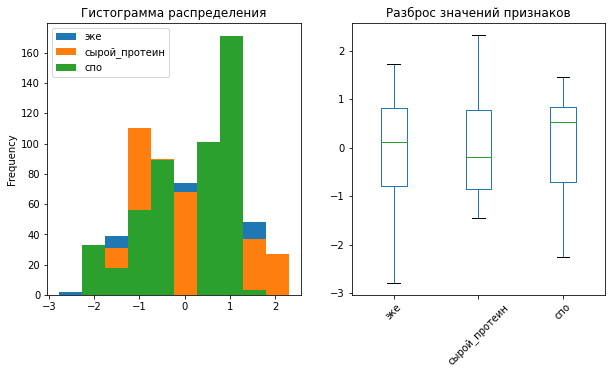

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Добавим новые столбцы для СПО и ЭКЕ:

In [45]:
ferma_main['спо_кат']=ferma_main.apply(CPO_cat, axis = 1)
ferma_main.head()

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_кат
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,низкий
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,низкий
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,низкий
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,низкий
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,низкий


In [46]:
ferma_main['эке_2']=ferma_main.apply(EKE2, axis = 1)
ferma_main.head()

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_кат,эке_2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,низкий,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,низкий,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,низкий,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,низкий,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,низкий,163.84


R2 score = 0.817320132573217


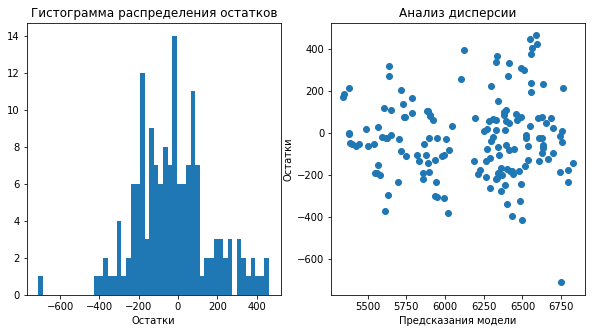

In [47]:
X = ferma_main.drop(columns = ['удой_кг','белок','жирность','вкус_молока','id','спо'], axis=1)
y = ferma_main['удой_кг']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

encoder = OneHotEncoder(sparse=False) 

cat_col_names = ['тип_пастбища','порода_папы_быка','возраст','спо_кат','порода']
num_col_names = ['эке_2','сырой_протеин','эке']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr2  = LinearRegression()
model_lr2.fit(X_train, y_train)
predictions2 = model_lr2.predict(X_test)

r2_2 = r2_score(y_test, predictions2)  

residuals2 = y_test - predictions2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals2, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions2,residuals2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
print('R2 score =',r2_2)
plt.show()

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь по выбору признаков те же ошибки, что и при построении первой модели, также неквадратичный ЭКЕ можем оставить вместе с ЭКЕ2

</div>


<div class="alert alert-block alert-info">
    
также исправила, оставила два столбца дла ЭКЕ
    
</div>

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   
   




   
   СПО стоит удалить из количественных

</div>


<div class="alert alert-block alert-info">
    
окей, удалила 
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Может возникнуть вопрос, почему после преобразования признаков мы оставляем неквадратичный ЭКЕ, но, преобразовав СПО в категориальный, удаляем его:
1) ЭКЕ: удой зависит от ЭКЕ квадратично. Если посмотреть на формулу квадратичного уравнения, в ней есть и Х и Х**2. Поэтому оставляем и ЭКЕ и ЭКЕ в квадрате

2) СПО: здесь видим, что есть два уровня фактора. Причём на каждом уровне зависимость факторов линейная. Поэтому пробуем перевести в категориальную бинарную шкалу. Т.е. фактор учли по иному. Поэтому исходный столбец удаляем.

</div>


Вывод: показатель  r2 увеличился на 3%, а также мы видим, что в данной модели меньше остатки и они стали более постоянны.

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Здесь важно отметить, что остатки стали более постоянны

</div>




<div class="alert alert-block alert-info">
    
исправила вывод
    
</div>

In [48]:
ferma_main = ferma_main.merge(ferma_dad, on='id')
ferma_main.info()
display(ferma_main.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой_кг           628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой_протеин     628 non-null    int64  
 4   спо               628 non-null    float64
 5   порода            628 non-null    object 
 6   тип_пастбища      628 non-null    object 
 7   порода_папы_быка  628 non-null    object 
 8   жирность          628 non-null    float64
 9   белок             628 non-null    float64
 10  вкус_молока       628 non-null    object 
 11  возраст           628 non-null    object 
 12  спо_кат           628 non-null    object 
 13  эке_2             628 non-null    float64
 14  имя_папы          628 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 78.5+ KB


,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_кат,эке_2,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,низкий,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,низкий,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,низкий,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,низкий,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,низкий,163.84,Барин


Построим 3-ю модель:

R2 score = 0.828830558483552


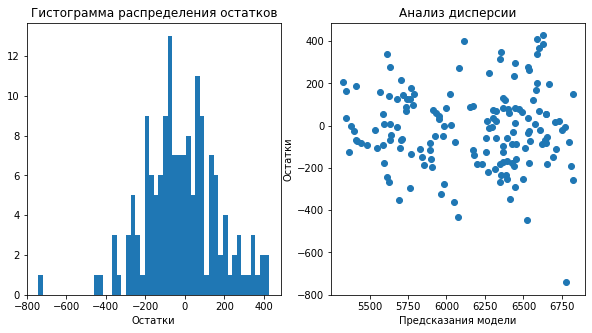

In [49]:
X = ferma_main.drop(columns = ['вкус_молока','удой_кг','белок','жирность','id','спо'], axis=1)
y = ferma_main['удой_кг']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

encoder = OneHotEncoder(sparse=False) 

cat_col_names = ['тип_пастбища','порода_папы_быка','возраст','спо_кат','имя_папы','порода']
num_col_names = ['эке_2','сырой_протеин','эке']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr3  = LinearRegression()
model_lr3.fit(X_train, y_train)
predictions3 = model_lr3.predict(X_test)

r2_3 = r2_score(y_test, predictions3)  

residuals3 = y_test - predictions3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals3, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions3,residuals3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
print('R2 score =',r2_3)
plt.show()

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь также исправляем ошибки по выбору признаков

</div>


<div class="alert alert-block alert-info">
    
исправила ошибки
    
</div>

Вывод: 3я модель предсказывает значения еще на 1,3% лучше.

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   
   Возможно из-за того, что оставили СПО в количественных

</div>




<div class="alert alert-block alert-info">
    
после удаления СПО остатки действительно стали меньше
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   👍

</div>


In [50]:
mae1 = mean_absolute_error(y_test, predictions)
mse1 = mean_squared_error(y_test, predictions)
rmse1 = mean_squared_error(y_test, predictions, squared=False) 

mae2 = mean_absolute_error(y_test, predictions2)
mse2 = mean_squared_error(y_test, predictions2)
rmse2 = mean_squared_error(y_test, predictions2, squared=False) 

mae3 = mean_absolute_error(y_test, predictions3)
mse3 = mean_squared_error(y_test, predictions3)
rmse3 = mean_squared_error(y_test, predictions3, squared=False) 

print('mae=',mae1,mae2,mae3,'mse=',mse1,mse2,mse3,'rmse=',rmse1,rmse2,rmse3)

mae= 164.2419446347492 150.77150504303904 145.50602729083894 mse= 43887.015009660514 37187.220727890526 34844.10128605486 rmse= 209.4922791170608 192.83988365452444 186.66574749014575


In [51]:
print('95% доверительный интервал =', st.norm.interval(0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

95% доверительный интервал = (6092.908246091, 6222.794879099884)


Вывод: По всем метрикам ошибки больше всего в 1й модели и меньше всего в 3-й модели, значит, мы правильно обучали модель. 
Финальная 3я модель ошибается в среднем примерно на 190 кг удоя, а доверительный интервал прогноза = от 6092 до 6222 (т.е. в 95% случаев предсказанное значение будет находиться в этом интервале, и в 5% случаев предсказанное значение будет выходить за рамки этого интервала) 

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Доверительный интервал расчитывается несколько иначе: кажется, этого не было в теории
 
Доверительный интервал мы высчитываем из дисперсии, это не перцентили. (И там действительно интервал - поэтому важно вывести оба значения (нижнее, верхнее)).
    
Разница с перцентилями такая: ты берешь и отсекаешь по 2,5% данных сверху и снизу, затем мы получаем, что 95% наших данных лежат в диапазоне.
    
Доверитальный же интервал нам говорит, что если мы случайно возьмем любое значение из нашей выборки, то в 95% случаев оно будет в этом интервале. 
    
Разницу можно почувствовать, если мысленно представить, что мы выбрали из нашего диапазона 95% перцентилей данных все, кроме одного единственного наблюдения. 
    
А дальше мы должны случайным образом взять еще одну строку из оставшейся выборки, включая и то, что лежит за границей перцентилей. Тогда нам придется выбирать между одной строкой, которая лежит в нашем 95% перцентиле и кучей строк, которые лежат вне его. 
    
Когда мы считаем перцентили, то мы со 100% вероятностью берем эту последнюю строку также из нашего распределения. Когда считаем доверительный интервал, то вероятность выбрать эту строку будет 1/n, где n - количество строк вне диапазона перцентилей. Очевидно, что перцентили не будут равны доверительному интервалу в таком случае.
    
    
100-95% = 5% = 1/20. Доверительный интервал, другими словами, говорит, что если мы возьмем рандомно двадцать значений, то 19 из них в среднем будут лежать внутри этого интервала и только одно − за ним.
    
https://www.codecamp.ru/blog/confidence-intervals-python/
 
```    
    
from scipy import stats as st
    
print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

```
    

</div>


<div class="alert alert-block alert-info">
    
поняла, спасибо!
добавила выше и дописала в выводе
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Да, также стоит учитывать, что в 5% случаев предсказанный удой может и не находится на интервале - об этом нужно помнить

</div>


<div class="alert alert-block alert-info">
    
окей

</div>

In [52]:
cow_buy_new=cow_buy
cow_buy_new['эке_2']=ferma_main['эке_2'].mean()*1.05
cow_buy_new['сырой_протеин']=ferma_main['сырой_протеин'].mean()*1.05
cow_buy_new['эке']=ferma_main['эке'].mean()*1.05
cow_buy_new['спо']=ferma_main['спо'].mean()*1.05
cow_buy_new['спо_кат']=cow_buy_new.apply(CPO_cat, axis = 1)
display(cow_buy_new.head(30))

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,эке,спо,спо_кат
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Умножая медианные значения в столбцах с характеристиками корма на 1.05, мы действительно соблюдаем требования заказчика

</div>


In [53]:
X_train = cow_buy_new.drop(columns = ['жирность','белок','спо'], axis=1)

cat_col_names = ['тип_пастбища','порода_папы_быка','возраст','спо_кат','имя_папы','порода']
num_col_names = ['эке_2','сырой_протеин','эке']

X_train_ohe = encoder.transform(X_train[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_scaled = scaler.transform(X_train[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_train['x3_низкий']=0



In [54]:
predictions3 = model_lr3.predict(X_train)
display(predictions3)


array([6321.6438613 , 6049.27652434, 6003.59959209, 6312.33781709,
       6265.65688208, 6082.04504914, 6321.6438613 , 6282.00882718,
       6003.59959209, 6079.60551426, 6065.0398131 , 6314.77735197,
       6321.6438613 , 5805.81698398, 6003.59959209, 6312.33781709,
       6065.0398131 , 6082.04504914, 6282.00882718, 6265.65688208])

In [55]:
cow_buy_new['удой_кг']=predictions3
display(cow_buy_new)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,эке,спо,спо_кат,удой_кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6321.643861
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6049.276524
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6003.599592
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6312.337817
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6265.656882
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6082.045049
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6321.643861
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6282.008827
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6003.599592
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6079.605514


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   А вот здесь обучать encoder и scaler не нужно - мы берем их от лучшей (третьей модели)

</div>


<div class="alert alert-block alert-info">
    
исправила

</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера v2❌**
   
   У scaler и encoder есть метод fit_transform - при его вызове одновременно происходит и обучение и трансформация. Мы уже обучили их при построении третьей модели. cow_buy_new это по факту наша новая тестовая выборка - поэтому `обучать encoder и scaler нам не нужно` - они обучены на третьей модели. Нужно `только трансформировать`.  Поэтому здесь к scaler и encoder нужно применить только метод `transform`.

</div>


<div class="alert alert-block alert-info">
    
поняла, поправила

</div>

Вывод: мы получили спрогнозированные значения удоя для коров.

<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Замечания по блоку устранены👍

</div>


## Обучение модели логистической регрессии

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь мы должны использовать все признаки по-максимуму. Я бы только не взял предсказанный удой, а по остальному - все пригодится. И вкус молока, и характеристики корма. Обрати внимание на жирность - там явно прослеживается, что мы должны сделать признак категориальным (три категории: до 3.45 низкая, средняя до 3.68 и высокая больше 3.68)


</div>


<div class="alert alert-block alert-info">
    
окей, поправила признаки

</div>

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Повторюсь, импорт функций необходимо перенести в отдельных блок в начале проекта. Объявление константы также переносится в начало проекта, после функций 

</div>




<div class="alert alert-block alert-info">
    
перенесла

</div>

In [56]:
ferma_main['жирность_кат']=ferma_main.apply(jirn, axis = 1)
ferma_main.head()

,id,удой_кг,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_кат,эке_2,имя_папы,жирность_кат
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,низкий,201.64,Буйный,средняя
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,низкий,163.84,Соловчик,средняя
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,низкий,196.00,Барин,средняя
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,низкий,153.76,Буйный,низкая
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,низкий,163.84,Барин,высокая


In [57]:
ferma_main['вкус_молока_1']=ferma_main.apply(vkus, axis = 1)

recall:  0.864
precision:  0.633
accuracy_score: 0.643312101910828


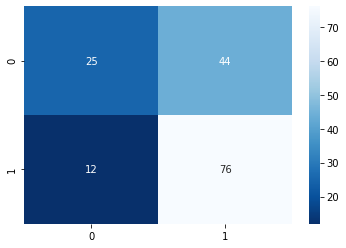

In [58]:
X = ferma_main.drop(columns=['вкус_молока_1','вкус_молока','удой_кг','id','жирность'])
y = ferma_main['вкус_молока_1']

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE
)
encoder = OneHotEncoder(sparse=False) 

cat_col_names = ['тип_пастбища','порода_папы_быка','возраст','спо_кат','имя_папы','порода', 'жирность_кат']
num_col_names = ['эке_2','сырой_протеин','белок','эке']

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression(random_state=RANDOM_STATE)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test,y_pred) 
precision = precision_score(y_test,y_pred) 

print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))
print('accuracy_score:',accuracy_score(y_test,y_pred)) 
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   При инициализации логистической регрессии необходимо использовать random_state. 

</div>


<div class="alert alert-block alert-info">
    
добавила

</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   В вычислении метрик также критично важно, чтобы реальные значения стояли первым аргументом функции.
    
recall_score(сначала_реальные_значения, потом_предсказанные)
    
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
    
Важно поправить везде.
    


</div>


<div class="alert alert-block alert-info">
    
исправила

</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Исправлено👍

</div>


<div class="alert alert-block alert-info">
    
убрала также признак жирность, т.к. добавили категориальный

</div>

Вывод: модель предсказывает значения с достаточно высокой вероятностью, - 70% правильных результатов.
Для фермера важнее, чтобы все купленные коровы давали вкусное молоко, а не купить всех возможных коров, которые потенциально могут давать вкусное молоко. Значит, для фермера важнее критерий precision

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Здесь я согласен с аргументацией максимизирования Precision.

</div>


In [59]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
columns = ['y_test', 'y_proba']).sort_values(by='y_proba',ascending=False) 
display(data.tail())
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)]
print(thresholds) 

,y_test,y_proba
144,0,0.328412
26,1,0.310197
46,0,0.286308
82,1,0.270364
84,0,0.255994


[0.1, 0.32, 0.55, 0.78]


In [60]:
probabilities_one_valid = clf.predict_proba(X_test)[:,1]    
    
for i in np.arange(0.5, 0.9, 0.05):
    y_pred = probabilities_one_valid > i
    print('порог: ', i, 'precision: ', precision_score(y_test, y_pred))

порог:  0.5 precision:  0.6333333333333333
порог:  0.55 precision:  0.6574074074074074
порог:  0.6000000000000001 precision:  0.7052631578947368
порог:  0.6500000000000001 precision:  0.7746478873239436
порог:  0.7000000000000002 precision:  0.8095238095238095
порог:  0.7500000000000002 precision:  0.8518518518518519
порог:  0.8000000000000003 precision:  0.7777777777777778
порог:  0.8500000000000003 precision:  1.0


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Порог подбираем по тестовой выборке. 

</div>


<div class="alert alert-block alert-info">
    
исправила

</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера v2❌**
   
   Не совсем понимаю методику такого подбора - мы должны ориентироваться на precision - лучше сделать это в цикле - и по нему понять, при каком пороге precision станет максимальным: 
```
probabilities_one_valid = clf.predict_proba(X_test)[:,1]    
    
for i in np.arange(0.5, 0.9, 0.05):
    y_pred = probabilities_one_valid > i
    print('порог: ', i, 'precision: ', precision_score(y_test, y_pred))
```  
 

</div>


<div class="alert alert-block alert-info">
    
да, так намного понятнее, у меня, видимо, что-то не так в коде

</div>

In [61]:
y_pred_2=[]
for i in probabilities_one_valid:
    if i>= 0.8:
        y_pred_2.append(1)
    else:
        y_pred_2.append(0)

print(y_pred_2)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Возьмем порог 0.8, т.к он дает наиболее точные предсказания.

recall:  0.08
precision:  0.778
accuracy_score: 0.4713375796178344


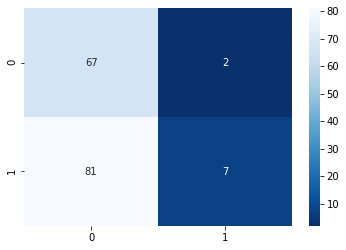

In [62]:
recall_2 = recall_score(y_test,y_pred_2) 
precision_2 = precision_score(y_test,y_pred_2) 

print('recall: ',round(recall_2 ,3))
print('precision: ',round(precision_2,3))
print('accuracy_score:',accuracy_score(y_test,y_pred_2)) 
cm = confusion_matrix(y_test,y_pred_2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Мы поменяли порогое значение и минимизировали вероятность, что у купленной коровы будет невкусное молоко.
Однако другие показатели модели - accuracy и recall снизились, т.к. в целом предсказания модели менее точны (коров с высокой вероятностью вкусного молока модель относит к невкусному, чтобы избежать ошибок).

In [63]:
cow_buy_new['жирность_кат']=cow_buy_new.apply(jirn, axis = 1)
cow_buy_new.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,эке,спо,спо_кат,удой_кг,жирность_кат
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6321.643861,средняя
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6049.276524,средняя
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6003.599592,средняя
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6312.337817,низкая
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6265.656882,средняя


In [64]:
X_train = cow_buy_new.drop(columns=['жирность','удой_кг'])

cat_col_names = ['тип_пастбища','порода_папы_быка','возраст','спо_кат','имя_папы','порода', 'жирность_кат']
num_col_names = ['эке_2','сырой_протеин','белок','эке']

X_train_ohe = encoder.transform(X_train[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_scaled = scaler.transform(X_train[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_train['x3_низкий']=0

y_pred_3 = clf.predict(X_train)
print(y_pred_3)
cow_buy_new['вкус_молока']=y_pred_3
display(cow_buy_new)

[1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0]


,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,эке,спо,спо_кат,удой_кг,жирность_кат,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6321.643861,средняя,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6049.276524,средняя,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6003.599592,средняя,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6312.337817,низкая,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6265.656882,средняя,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6082.045049,средняя,0
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6321.643861,средняя,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6282.008827,средняя,1
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6003.599592,средняя,0
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6079.605514,низкая,1


<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Здесь также не нужно заново обучать encoder и scaler - мы берем их от построенной модели логистической регрессии

</div>


<div class="alert alert-block alert-info">
    
убрала

</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера v2❌**
   
   Аналогично с предсказанием удоя. Не нужно заново обучать scaler и encoder - просто трансформировать

</div>


<div class="alert alert-block alert-info">
    
поправила

</div>

## Итоговые выводы

In [65]:
cow_buy_final = cow_buy_new.loc[cow_buy_new['удой_кг']>6000]
cow_buy_final = cow_buy_new.loc[cow_buy_new['вкус_молока']==1]
display(cow_buy_final)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке_2,сырой_протеин,эке,спо,спо_кат,удой_кг,жирность_кат,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6321.643861,средняя,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6049.276524,средняя,1
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6321.643861,средняя,1
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6282.008827,средняя,1
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6079.605514,низкая,1
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,5805.816984,низкая,1
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,224.025225,2019.947532,15.276162,0.958744,высокий,6065.039813,высокая,1


<div class="alert alert-warning">

**⚠️ Комментарий ревьюера ⚠️**
   
   Посмотрим на результат после исправления ошибок 

</div>




<div class="alert alert-block alert-info">
    
выводимые данные изменились, поправила в выводе

</div>

### Итоговый вывод:
    Мы получили список из 16 коров, которые с наибольшей вероятностью будут иметь удой молока более 6000 и их молоко будет вкусным.
    Также можно порекомендовать фермеру ориентироваться для дальнейших покупок на тех коров, которые точно дадут вкусное молоко, но чуть менее 6000 удоя. Одним из наиболее влиятельных признаков для покупки также является порода папы быка, фермеру стоит обращать внимание на данный признак. Также коровы младше 2х лет, как правило, дадут не очень большой объем удоя.
    
    Для улучшения качества регрессионной модели мы закодировали категориальные признаки двоичной записью, мастабировали количественные признаки, чтобы они имнели равный вес в модели, а затме преобразовали признаки ЭКЕ и СПО, т.к. они связаны с целевым показателем нелинейно. Также добавили признак Имя Папы для более точного прогноза, и добавили категориальный признак для жирности.
    Результаты регрессионной модели можно улучшить при наличии большего объема информации и, возможно, при большем количестве признаков. Также в датафрейме с коровами, предназначенными для покупки, были не все признаки из общего датафреймя, что могло снизить результативность модели.
    
    Для анализа работы регрессионной моделей мы использовали метрики: 
    1) Коэффициент детерминации R^2 (показывает, в скольких процентах случаев предсказание модели точнее, чем среднее значение целевого признака)
    2) MSE. Средняя абсолютная ошибка. Показывает, на какое значение предсказание в среднем отличается от истинного значения. Измеряется в единицах целевого признака.
    3) MAE. Квадратный корень из средней квадратичной ошибки. Показывает, на какое значение в среднем предсказание отличается от истинного значения. Измеряется в единицах целевого признака.
    4) RMSE. Средняя квадратичная ошибка. Показывает, на какое значение в среднем предсказание отличается от истинного значения. Измеряется в квадратных единицах целевого признака.
    Для анализа работы логистической модели использовали метрики:
    1) Precision. Эта метрика показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. 
    2) Recall. Метрика, обратная precision — recall. На русском языке её называют полнотой. Она измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. 
    3) Accuracy. Оценивает количество верных предсказаний.
    
  

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Полина, проведено основательное и подробное исследование. Ниже приведу общую сводку замечаний, которые необходимо исправить:
    
1. Не забывать про стандарт pep8
2. При устранении аномалии с выбросом по удою, не забыть удалить строку с таким же id у ferma_dad.csv, чтобы таблицы объединились корректно
3. Построить соответствующие графики для категориальных и количественных признаков у всех таблиц, своевременно их объединить, а также учитывать, что не во всех признаках данные распределены нормально

4. Использовать другой подход к расчету коэф корреляции, также еще раз посмотреть на наличие мультиколлинеарности
5. Обратить внимание, что жирность также разделяется на кластеры - учитывать это при построении моделей
6. Устранить ошибки в выборе признаков 
    
7. Правильно рассчитать доверительный интервал
8. При инициализации логистической регрессии необходимо использовать random_state.
9. В вычислении метрик критично важно, чтобы реальные значения стояли первым аргументом функции.
10. Не обучать скалер и энкодер на тестовых данных 
11. Порог в логистической регрессии подбирать на тестовых данных

    
    
    
Жду твой проект на повторное ревью. Успехов!

</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Полина, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>